**Stage 1: Study Replication**

The performance metrics for each dataset and classifier developed by Doppala et al. are presented in the figure below  (Doppala, Bhattacharyya, Janarthanan, & Baik, 2022).

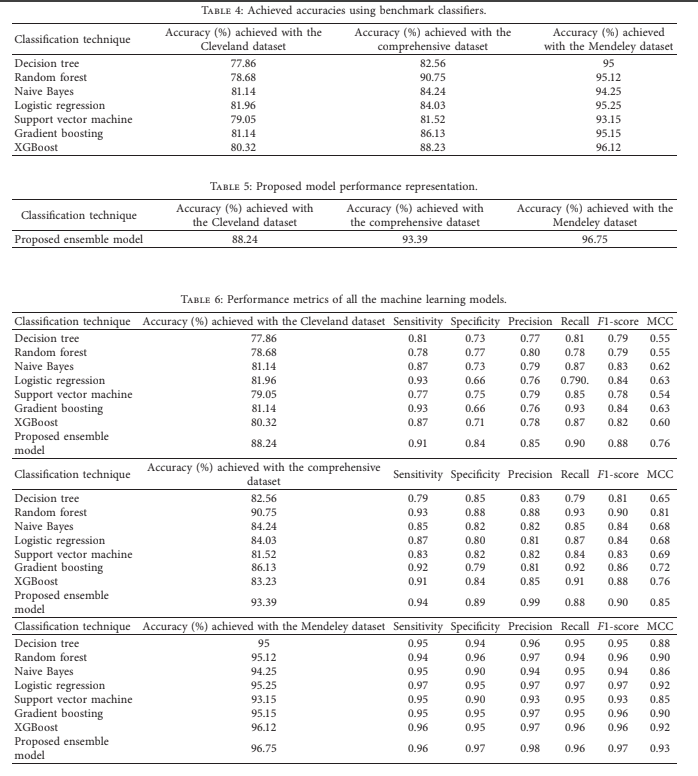

Bibliography

Doppala, B. P., Bhattacharyya, D., Janarthanan, M., & Baik, N. (2022, March 8). A Reliable Machine Intelligence Model for Accurate Identification of Cardiovascular Diseases Using Ensemble Techniques. Hindawi Journal of Healthcare Engineering, 2022. doi:https://doi.org/10.1155/2022/2585235









**Dataset 2: Mendeley Dataset**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/Cardiovascular_Disease_Dataset.csv"
data_india = pd.read_csv(path,encoding='utf-8-sig')
data_india.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
#Identify duplicate rows in Mendeley Data
india_rows = data_india.shape[0]
india_dups = data_india[data_india.duplicated(keep=False)].shape[0]
print('There are '+ str(india_dups)+ ' duplicate records out of '+ str(india_rows)+' total records')

#Check for null values in Mendeley dataset
null_india =data_india.isna().sum().sum()
print("There are " + str(null_india) + " null values in the india dataset")

There are 0 duplicate records out of 1000 total records
There are 0 null values in the india dataset


In [ ]:
#Drop patientid feature
data_india = data_india.drop('patientid', axis=1)

In [ ]:
#one-hot coding of india Data categorical independent variables

#The variables treated with one-hot encoding is unclear in replication paper, however 5 variables below are commonly encoded as in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis by Gupta et. al
data_india_coded = pd.get_dummies(data_india, columns=['chestpain','restingrelectro','slope','noofmajorvessels'], prefix=['chestpain','restingrelectro','slope','noofmajorvessels'], drop_first=True)

In [ ]:
#Output new column names as list for ease of use in test train split below
data_india_coded.columns.values

array(['age', 'gender', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak',
       'target', 'chestpain_1', 'chestpain_2', 'chestpain_3',
       'restingrelectro_1', 'restingrelectro_2', 'slope_1', 'slope_2',
       'slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2',
       'noofmajorvessels_3'], dtype=object)

In [ ]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_india_coded.loc[:,['age', 'gender', 'restingBP', 'serumcholestrol','fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak','chestpain_1', 'chestpain_2', 'chestpain_3','restingrelectro_1', 'restingrelectro_2', 'slope_1', 'slope_2','slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2','noofmajorvessels_3']]
dependent = data_india_coded.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [ ]:
#Following advice of Jason Brownlee of https://machinelearningmastery.com/data-preparation-without-data-leakage/ and
#Data Preparation for Machine Learning Data Cleaning, Feature Selection, and Data Transforms in Python
#All data preparation must be fit on the training set only

#Data will be scaled using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Subset of numerical features
india_numerical =['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Initialize RobustScaler
scaler = MinMaxScaler()
#Fit on the training dataset to the RobustScaler instance. Fitting the data to the training set only prevents data leakage and the test set will be transformed based on training data parameters
scaler.fit(x_train[india_numerical])

#Scale the training data using the RobustScaler instance
x_train[india_numerical] = scaler.transform(x_train[india_numerical])
#Scale the testing data using the RobustScaler instance
x_test[india_numerical] = scaler.transform(x_test[india_numerical])

In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Initialize the decision tree classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_decision_tree = DecisionTreeClassifier(random_state=0)

#Fit the training data set to the decision tree model
india_decision_tree.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the india_decision_tree model
target_pred_decision_tree = india_decision_tree.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,92.75,0.933,0.944,0.923,0.934,0.854


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_random_forest = RandomForestClassifier(random_state=0)

#Fit the training data set to the random forest classifier
india_random_forest.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the india_random_forest model
target_pred_random_forest = india_random_forest.predict(x_test)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,96.0,0.944,0.956,0.973,0.964,0.919


In [ ]:
#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Initialize the naive bayes models and assign to variable
india_naive_numerical = GaussianNB()
india_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
india_categorical_nb = ['gender', 'fastingbloodsugar','exerciseangia','chestpain_1', 'chestpain_2', 'chestpain_3', 'restingrelectro_1', 'restingrelectro_2', 'slope_1', 'slope_2', 'slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2', 'noofmajorvessels_3']
india_numerical_nb = ['age', 'restingBP',	'serumcholestrol', 'maxheartrate','oldpeak']

# Fit the categorical features in the training data set to the categorical naive bayes model
india_naive_categorical.fit(x_train[india_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
india_naive_numerical.fit(x_train[india_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = india_naive_categorical.predict_proba(x_test[india_categorical_nb])
probability_numerical= india_naive_numerical.predict_proba(x_test[india_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Naive Bayes,94.0,0.911,0.93,0.964,0.947,0.879


In [ ]:
#Logistic Regression

#Import logistic regression model from scikit-learn libraries
from sklearn.linear_model import LogisticRegression

#Initialize the logistic regression model and assign to variable india_logistic_reg variable. Assign random_state 16 to reproduce results
india_logistic_reg = LogisticRegression(random_state=0, max_iter=1000000)

#Fit the training data set to the logistic model
india_logistic_reg.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the india_logistic_reg
target_pred_logistic = india_logistic_reg.predict(x_test)

accuracy_logistic =  round(accuracy_score(y_test, target_pred_logistic),4)*100
precision_logistic = round(precision_score(y_test, target_pred_logistic, pos_label=1),3)
recall_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=1),3)
f1_score_logistic = round(f1_score(y_test, target_pred_logistic, pos_label=1),3)
mcc_logistic = round(matthews_corrcoef(y_test, target_pred_logistic),3)
specificity_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic = [["Logistic Regression", accuracy_logistic,specificity_logistic,precision_logistic,recall_logistic,f1_score_logistic,mcc_logistic]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Logistic Regression,96.0,0.939,0.952,0.977,0.964,0.919


In [ ]:
#Import support vector machine from scikit-learn libraries
from sklearn import svm

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_support_vector = svm.SVC(kernel='linear', random_state=0)

#Fit the training data set to the support vector machine classifier
india_support_vector.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the india_support_vector
target_pred_support_vector = india_support_vector.predict(x_test)

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector,specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Support Vector,96.75,0.955,0.964,0.977,0.971,0.934


In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#Fit the training data set to the support vector machine classifier
india_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the india_gradient
target_pred_gradient = india_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,97.5,0.95,0.961,0.995,0.978,0.95


In [ ]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)

#Fit the training data set to the support vector machine classifier
india_xgb.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the india_xgb
target_pred_xgb = india_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,97.5,0.966,0.973,0.982,0.977,0.949


In [ ]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier

#Initialize a categorical naive bayes classifier and train using categorical training set
ensemble_categorical_nb = CategoricalNB()
ensemble_categorical_nb.fit(x_train[india_categorical_nb], y_train.values.ravel())

#Initialize a gaussian naive bayes classifier and train using numerical (i.e continuous numerical features) training set
ensemble_numerical_nb = GaussianNB()
ensemble_numerical_nb.fit(x_train[india_numerical_nb], y_train.values.ravel())

# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier()
ensemble_random_forest.fit(x_train, y_train.values.ravel())

ensemble_svm = svm.SVC(probability=True)
ensemble_svm.fit(x_train, y_train.values.ravel())

ensemble_gradient = GradientBoostingClassifier()
ensemble_gradient.fit(x_train, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_categorical_nb',ensemble_categorical_nb),('ensemble_numerical_nb',ensemble_numerical_nb),('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient),('ensemble_svm', ensemble_svm)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_train[india_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_train[india_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_train),
                     ensemble_gradient.predict_proba(x_train),
                     ensemble_svm.predict_proba(x_train)]),
    y_train.values.ravel()
)

#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_test[india_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_test[india_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_test),
                     ensemble_gradient.predict_proba(x_test),
                     ensemble_svm.predict_proba(x_test)])
)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]
performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Ensemble,97.5,0.966,0.973,0.982,0.977,0.949


**Stage 1A: Changes to Approximate Study Accuracy**

Hyperparameter tuning will be attempted to approximate the accuracy measure of the study paper.

In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
india_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_india_dt = GridSearchCV(india_decision_tree , param_grid, cv=10)
grid_india_dt.fit(x_train, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_india_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
india_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
india_decision_tree.fit(x_train, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = india_decision_tree.predict(x_test)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,97.0,0.972,0.977,0.968,0.973,0.939


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable india_random_forest. Assign random_state 42 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_india_rf = GridSearchCV(india_random_forest , param_grid, cv=10)
grid_india_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_india_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
india_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
india_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = india_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_decision_tree = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Despite performing GridSearchCV, the accuracy remains unchanged. RandomSearchCV is attempted next

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,96.0,0.944,0.956,0.973,0.964,0.919


In [ ]:
#Import RandomizedSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Initialize the random forest classifier and assign to variable india_random_forest. Assign random_state 42 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_india_rf = RandomizedSearchCV(india_random_forest , param_grid, cv=10)
grid_india_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_india_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
india_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
india_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = india_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_decision_tree = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Results are the same despite performing RandomSearchCV

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini'}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,96.0,0.944,0.956,0.973,0.964,0.919


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable india_gradient. Assign random_state 42 to reproduce results
india_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
india_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_india_gb = GridSearchCV(india_gradient, param_dist, cv=10)
grid_india_gb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_india_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
india_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
india_gradient.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the india_gradient
target_pred_gradient = india_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,97.5,0.966,0.973,0.982,0.977,0.949


In [ ]:
#XGBoost

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(enable_categorical=True, seed= 42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_india_xgb = GridSearchCV(india_xgb , param_grid, cv=10)
grid_india_xgb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_xgb = grid_india_xgb.best_params_
print(best_params_xgb)

#Fit the model using athe best parameters
india_xgb = xgb.XGBClassifier(**best_params_xgb, seed=42)
india_xgb.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = india_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,97.5,0.966,0.973,0.982,0.977,0.949


**Stage 2: Improvements to Classifiers**

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/Cardiovascular_Disease_Dataset.csv"
data_india = pd.read_csv(path,encoding='utf-8-sig')
data_india.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
#Identify duplicate rows in Mendeley Data
india_rows = data_india.shape[0]
india_dups = data_india[data_india.duplicated(keep=False)].shape[0]
print('There are '+ str(india_dups)+ ' duplicate records out of '+ str(india_rows)+' total records')

#Check for null values in Mendeley dataset
null_india =data_india.isna().sum().sum()
print("There are " + str(null_india) + " null values in the india dataset")

There are 0 duplicate records out of 1000 total records
There are 0 null values in the india dataset


In [ ]:
#Drop patientid feature
data_india = data_india.drop('patientid', axis=1)

In [ ]:
#one-hot coding of india Data categorical independent variables

#The variables treated with one-hot encoding is unclear in replication paper, however 5 variables below are commonly encoded as in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis by Gupta et. al
data_india_coded = pd.get_dummies(data_india, columns=['chestpain','restingrelectro','slope','noofmajorvessels'], prefix=['chestpain','restingrelectro','slope','noofmajorvessels'], drop_first=True)

In [ ]:
#Output new column names as list for ease of use in test train split below
data_india_coded.columns.values

array(['age', 'gender', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak',
       'target', 'chestpain_1', 'chestpain_2', 'chestpain_3',
       'restingrelectro_1', 'restingrelectro_2', 'slope_1', 'slope_2',
       'slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2',
       'noofmajorvessels_3'], dtype=object)

In [ ]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_india_coded.loc[:,['age', 'gender', 'restingBP', 'serumcholestrol','fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak','chestpain_1', 'chestpain_2', 'chestpain_3','restingrelectro_1', 'restingrelectro_2', 'slope_1', 'slope_2','slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2','noofmajorvessels_3']]
dependent = data_india_coded.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [ ]:
#Following advice of Jason Brownlee of https://machinelearningmastery.com/data-preparation-without-data-leakage/ and
#Data Preparation for Machine Learning Data Cleaning, Feature Selection, and Data Transforms in Python
#All data preparation must be fit on the training set only

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit on the training dataset to the RobustScaler instance. Fitting the data to the training set only prevents data leakage and the test set will be transformed based on training data parameters
scaler.fit(x_train[india_numerical])

#Scale the training data using the RobustScaler instance
x_train[india_numerical] = scaler.transform(x_train[india_numerical])
#Scale the testing data using the RobustScaler instance
x_test[india_numerical] = scaler.transform(x_test[india_numerical])

In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
india_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = india_merge[india_merge['target'] == 1]
healthy = india_merge[india_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['age']
age_healthy = healthy['age']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [["age", t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,age,0.049672,0.9604,N


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
india_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = india_merge[india_merge['target'] == 1]
healthy = india_merge[india_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['restingBP']
age_healthy = healthy['restingBP']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['restingBP', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,restingBP,13.933704,2.028086e-38,Y


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
india_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = india_merge[india_merge['target'] == 1]
healthy = india_merge[india_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['serumcholestrol']
age_healthy = healthy['serumcholestrol']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['serumcholestrol', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,serumcholestrol,4.198321,0.000031,Y


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
india_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = india_merge[india_merge['target'] == 1]
healthy = india_merge[india_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['maxheartrate']
age_healthy = healthy['maxheartrate']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['maxheartrate', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,maxheartrate,4.932895,0.000001,Y


In [ ]:
#Feature Selection: Numerical Features - Binary Output

#Import Statistics module
from scipy.stats import ttest_ind

#Merge the dataframes to assist in separation of the healthy and diseased instances
india_merge = x_train.join(y_train)

#Separate training set into diseased and healthy dataframes
disease = india_merge[india_merge['target'] == 1]
healthy = india_merge[india_merge['target']==0]

#Separate age features into diseased and healthy dataframes
age_disease = disease['oldpeak']
age_healthy = healthy['oldpeak']

t_statistic, p_value = ttest_ind(age_disease, age_healthy)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['oldpeak', t_statistic,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'T-Statistic','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,T-Statistic,P-Value,Accept?
,oldpeak,2.338092,0.019711,Y


In [ ]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
india_sex = pd.crosstab(x_train['gender'], y_train['target'])

# Calculate odds ratio and p-value for india sex feature
odds_ratio, p_value = fisher_exact(india_sex)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['gender', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,gender,1.048047,0.8418,N


In [ ]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
india_fbs = pd.crosstab(x_train['fastingbloodsugar'], y_train['target'])

# Calculate odds ratio and p-value for india fasting blood sugar feature
odds_ratio, p_value = fisher_exact(india_fbs)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['fastingbloodsugar', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,fastingbloodsugar,4.229369,2.109827e-13,Y


In [ ]:
#Calculating odds ratios for categorical features with only 2 levels (i.e. binary features)

import pandas as pd
#Import fisher exact to perform odds ratio test
from scipy.stats import fisher_exact

#Construct a contingency table
india_exang = pd.crosstab(x_train['exerciseangia'], y_train['target'])

# Calculate odds ratio and p-value for india fasting blood sugar feature
odds_ratio, p_value = fisher_exact(india_exang)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['exerciseangia', odds_ratio,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Odds Ratio','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Odds Ratio,P-Value,Accept?
,exerciseangia,0.872977,0.453631,N


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
india_chi = data_india.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
india_cp = pd.crosstab(india_chi['chestpain'], india_chi['target'])

# Calculate chi_sq value and p-value for india chest pain feature
chi_sq, p_value, dof, expected = chi2_contingency(india_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['chestpain', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,chestpain,190.11964,5.751285e-41,Y


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
india_chi = data_india.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
india_cp = pd.crosstab(india_chi['restingrelectro'], india_chi['target'])

# Calculate chi_sq value and p-value for india restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(india_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['restingelectro', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,restingelectro,100.532527,1.477880e-22,Y


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
india_chi = data_india.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
india_cp = pd.crosstab(india_chi['slope'], india_chi['target'])

# Calculate chi_sq value and p-value for india restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(india_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['slope', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,slope,441.466344,2.302346e-95,Y


In [ ]:
#Calculating chi-squared test for categorical features with more than 2 levels

#Import necessary classes
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Filter uncoded, raw data table to reflect rows from training set
india_chi = data_india.loc[x_train.index, :]

#Crosstabulate data in filtered, uncoded, raw data table
india_cp = pd.crosstab(india_chi['noofmajorvessels'], india_chi['target'])

# Calculate chi_sq value and p-value for india restecg feature
chi_sq, p_value, dof, expected = chi2_contingency(india_cp)

#Test p-value
if p_value < 0.05:
    test = "Y"
else:
    test = "N"

#Organize performance metrics into a list
results_list = [['noofmajorvessels', chi_sq,p_value,test]]

#Create dataframe of performance metrics
simple_results= pd.DataFrame(results_list, columns=['Feature', 'Chi-Squared','P-Value', 'Accept?'])
simple_results.index = [""]

simple_results

,Feature,Chi-Squared,P-Value,Accept?
,noofmajorvessels,182.503197,2.540212e-39,Y


In [ ]:
#Modify training and test records

#Features to drop based on simple filters
features_remove = ['age','gender','exerciseangia']

#Remove selected features from x_train and x_test to evaluate model based on hold-out method
x_train_simple = x_train.drop(columns=features_remove)
x_test_simple = x_test.drop(columns=features_remove)

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_remove = ['age','gender','exerciseangia']

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_simple = data_india_coded.drop(columns=['target'] + features_remove)
y_simple = data_india_coded['target']

#Fit the consistent dataset to the RobustScaler instance.
x_simple[india_numerical] = scaler.fit_transform(x_simple[india_numerical])

In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the decision tree classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_decision_tree = DecisionTreeClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_decision_tree.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the india_decision_tree model
target_pred_decision_tree = india_decision_tree.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Decision Tree,93.0,0.927,0.941,0.932,0.936,0.859,0.008738,197.6


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
india_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_india_dt = GridSearchCV(india_decision_tree , param_grid, cv=10)
grid_india_dt.fit(x_train_simple, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_india_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
india_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
india_decision_tree.fit(x_train_simple, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = india_decision_tree.predict(x_test_simple)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,95.25,0.944,0.955,0.959,0.957,0.904


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
india_decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold (will complete 30 rounds in total)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_decision_tree.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_decision_tree = india_decision_tree.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_decision_tree)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_decision_tree)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       95.50
Precision      95.89
Recall         96.44
F1 Score       96.13
MCC            90.84
Specificity    94.21
dtype: float64

Standard Deviation Metrics:
Accuracy       2.05
Precision      2.41
Recall         2.56
F1 Score       1.76
MCC            4.18
Specificity    3.52
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_random_forest.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the india_random_forest model
target_pred_random_forest = india_random_forest.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Random Forest,96.25,0.944,0.956,0.977,0.966,0.924,0.336036,202.68


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable india_random_forest. Assign random_state 42 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_india_rf = GridSearchCV(india_random_forest , param_grid, cv=10)
grid_india_rf.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_india_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
india_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
india_random_forest.fit(x_train_simple, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = india_random_forest.predict(x_test_simple)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
india_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= india_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       97.30
Precision      97.46
Recall         97.93
F1 Score       97.68
MCC            94.49
Specificity    96.43
dtype: float64

Standard Deviation Metrics:
Accuracy       1.78
Precision      1.95
Recall         1.83
F1 Score       1.53
MCC            3.66
Specificity    2.78
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the naive bayes models and assign to variable
india_naive_numerical = GaussianNB()
india_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
india_categorical_nb = ['fastingbloodsugar','chestpain_1', 'chestpain_2', 'chestpain_3', 'restingrelectro_1', 'restingrelectro_2', 'slope_1', 'slope_2', 'slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2', 'noofmajorvessels_3']
india_numerical_nb = ['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

# Fit the categorical features in the training data set to the categorical naive bayes model
india_naive_categorical.fit(x_train_simple[india_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
india_naive_numerical.fit(x_train_simple[india_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = india_naive_categorical.predict_proba(x_test_simple[india_categorical_nb])
probability_numerical= india_naive_numerical.predict_proba(x_test_simple[india_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Naive Bayes,94.0,0.911,0.93,0.964,0.947,0.879,0.024183,203.19


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import CategoricalNB, GaussianNB

#List categorical and numerical feature names
india_categorical_nb = ['fastingbloodsugar','chestpain_1', 'chestpain_2', 'chestpain_3', 'restingrelectro_1', 'restingrelectro_2', 'slope_1', 'slope_2', 'slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2', 'noofmajorvessels_3']
india_numerical_nb = ['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

# Initialize Naive Bayes models and assign to variables
india_naive_categorical = CategoricalNB()
india_naive_numerical = GaussianNB()

# Combine categorical and numerical features
x_naive = x_simple[india_categorical_nb + india_numerical_nb]

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# Iterate through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_naive, y_simple):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_naive.iloc[train_index], x_naive.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    # Fit the training data set to the categorical and numerical Naive Bayes models
    india_naive_categorical.fit(x_train_fold[india_categorical_nb], y_train_fold.values.ravel())
    india_naive_numerical.fit(x_train_fold[india_numerical_nb], y_train_fold.values.ravel())

    # Predict probabilities for using categorical and numerical features
    probability_categorical = india_naive_categorical.predict_proba(x_test_fold[india_categorical_nb])
    probability_numerical = india_naive_numerical.predict_proba(x_test_fold[india_numerical_nb])

    # Combine the probabilities using the product rule
    total_probability = probability_categorical * probability_numerical

    # Use this code to select the class that has the greatest probability for a given row
    target_pred_naive = np.argmax(total_probability, axis=1)

    # Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_naive) * 100, 2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_naive) * 100, 2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=0) * 100, 2))

# Create a DataFrame to store metrics for each fold
performance_metrics_naive = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

# Calculate mean and standard deviation across folds
mean_metrics_naive = round(performance_metrics_naive.mean(), 2)
std_metrics_naive = round(performance_metrics_naive.std(), 2)

# Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics_naive)
print('\nStandard Deviation Metrics:')
print(std_metrics_naive)

# performance_metrics_naive

In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_logistic_reg = LogisticRegression(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_logistic_reg.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the india_logistic_reg model
target_pred_logistic_reg = india_logistic_reg.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_logistic_reg =  round(accuracy_score(y_test, target_pred_logistic_reg),4)*100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1),3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1),3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1),3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg),3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg,precision_logistic_reg,recall_logistic_reg,f1_score_logistic_reg,mcc_logistic_reg, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_reg = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Logistic Regression,94.75,0.922,0.939,0.968,0.953,0.894,0.033456,203.54


In [ ]:
# Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier and assign it to the variable india_logistic_reg. Assign random_state 42 to reproduce results
india_logistic_reg = LogisticRegression(random_state=42)

# A parameter grid for logistic regression
param_grid = {'max_iter':[100,110,120,130,140],
              'C' : [1.0,1.5,2.0,2.5]}

# Initialize the GridSearchCV class using the logistic regression model, the parameter grid, and a 10-fold cross-validation
grid_india_lr = GridSearchCV(india_logistic_reg, param_grid, cv=10)
grid_india_lr.fit(x_train_simple, y_train.values.ravel())

# Output the best parameters based on accuracy score
best_params_lr = grid_india_lr.best_params_
print(best_params_lr)

#Fit the model using the best parameters
india_logistic_reg = LogisticRegression(**best_params_lr, random_state=42)
india_logistic_reg.fit(x_train_simple, y_train.values.ravel())

#Use the best model to calculate predictions
target_pred_logistic_reg = india_logistic_reg.predict(x_test_simple)

# Calculate Performance Metrics
accuracy_logistic_reg = round(accuracy_score(y_test, target_pred_logistic_reg), 4) * 100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1), 3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg), 3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0), 3)

# Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_score_logistic_reg, mcc_logistic_reg]]

# Create a DataFrame of performance metrics
grid_lr_pm = pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_lr_pm.index = [""]

grid_lr_pm

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_logistic_reg = LogisticRegression(C= 1.0, max_iter= 100, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_logistic_reg.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_logistic_reg= india_logistic_reg.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_logistic_reg)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_logistic_reg)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Support Vector Machine

from sklearn.model_selection import cross_val_score
from sklearn import svm

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_support_vector = svm.SVC(kernel='linear', random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_support_vector.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_support_vector = india_support_vector.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector, specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Support Vector,95.25,0.939,0.951,0.964,0.957,0.904,0.021854,204.37


In [ ]:
# Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Initialize the SVM classifier and assign it to the variable india_svm. Assign random_state 42 to reproduce results
india_svm = SVC(random_state=42)

# A parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize the GridSearchCV class using the SVM model, the parameter grid, and a 10-fold cross-validation
grid_india_svm = GridSearchCV(india_svm, param_grid, cv=10)
grid_india_svm.fit(x_train_simple, y_train.values.ravel())

# Output the best parameters based on accuracy score
best_params_svm = grid_india_svm.best_params_
print(best_params_svm)

# Fit the model using the best parameters
india_svm = SVC(**best_params_svm, random_state=42)
india_svm.fit(x_train_simple, y_train.values.ravel())

# Use the best model to calculate predictions
target_pred_svm = india_svm.predict(x_test_simple)

# Calculate Performance Metrics
accuracy_svm = round(accuracy_score(y_test, target_pred_svm), 4) * 100
precision_svm = round(precision_score(y_test, target_pred_svm, pos_label=1), 3)
recall_svm = round(recall_score(y_test, target_pred_svm, pos_label=1), 3)
f1_score_svm = round(f1_score(y_test, target_pred_svm, pos_label=1), 3)
mcc_svm = round(matthews_corrcoef(y_test, target_pred_svm), 3)
specificity_svm = round(recall_score(y_test, target_pred_svm, pos_label=0), 3)

# Organize performance metrics into a list
performance_svm = [["Support Vector Machine", accuracy_svm, specificity_svm, precision_svm, recall_svm, f1_score_svm, mcc_svm]]

# Create a DataFrame of performance metrics
grid_svm_pm = pd.DataFrame(performance_svm, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_svm_pm.index = [""]

grid_svm_pm

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import svm
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_support_vector = svm.SVC(kernel='linear', random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_support_vector.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_support_vector= india_support_vector.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_support_vector)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_support_vector)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable. Assign random_state 0 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_gradient.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_gradient = india_gradient.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient", accuracy_gradient, specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Gradient,97.0,0.944,0.956,0.991,0.973,0.94,0.101133,204.37


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable india_gradient. Assign random_state 42 to reproduce results
india_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
india_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_india_gb = GridSearchCV(india_gradient, param_dist, cv=10)
grid_india_gb.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_india_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
india_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
india_gradient.fit(x_train_simple, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the india_gradient
target_pred_gradient = india_gradient.predict(x_test_simple)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,97.25,0.966,0.973,0.977,0.975,0.944


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       97.17
Precision      97.95
Recall         97.18
F1 Score       97.55
MCC            94.23
Specificity    97.14
dtype: float64

Standard Deviation Metrics:
Accuracy       1.58
Precision      1.78
Recall         1.89
F1 Score       1.36
MCC            3.22
Specificity    2.53
dtype: float64


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#XGBoost

#Import xgb boosting classifier from scikit-learn libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_xgb.fit(x_train_simple, y_train.values.ravel()).predict(x_test_simple)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_xgb = india_xgb.predict(x_test_simple)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb, specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,XGBoost,96.75,0.95,0.96,0.982,0.971,0.934,0.090567,222.9


In [ ]:
#XGBoost

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(enable_categorical=True, seed= 42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_india_xgb = GridSearchCV(india_xgb , param_grid, cv=10)
grid_india_xgb.fit(x_train_simple, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_xgb = grid_india_xgb.best_params_
print(best_params_xgb)

#Fit the model using athe best parameters
india_xgb = xgb.XGBClassifier(**best_params_xgb, seed=42)
india_xgb.fit(x_train_simple, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = india_xgb.predict(x_test_simple)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.9}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,96.75,0.95,0.96,0.982,0.971,0.934


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0),2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       97.17
Precision       0.98
Recall          0.97
F1 Score        0.97
MCC             0.94
Specificity     0.97
dtype: float64

Standard Deviation Metrics:
Accuracy       1.58
Precision      0.02
Recall         0.02
F1 Score       0.01
MCC            0.03
Specificity    0.03
dtype: float64


In [ ]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier


# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier(random_state = 42)
ensemble_random_forest.fit(x_train_simple, y_train.values.ravel())


ensemble_gradient = GradientBoostingClassifier(random_state = 42)
ensemble_gradient.fit(x_train_simple, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_gradient.predict_proba(x_train_simple),
                     ensemble_random_forest.predict_proba(x_train_simple)]),
    y_train.values.ravel()
)

#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_gradient.predict_proba(x_test_simple),
                     ensemble_random_forest.predict_proba(x_test_simple)])
)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computational Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_ensemble = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Ensemble,97.0,0.961,0.969,0.977,0.973,0.939,0.29127,223.5


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Initialize classifiers

ensemble_random_forest = RandomForestClassifier(random_state=42)
ensemble_gradient = GradientBoostingClassifier(random_state=42)

# Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_random_forest', ensemble_random_forest),('ensemble_gradient', ensemble_gradient)]

ensemble = VotingClassifier(estimators=algorithms, voting='soft')

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]


    # Fit the entire training set
    ensemble_random_forest.fit(x_train_fold, y_train_fold.values.ravel())
    ensemble_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Specify Algorithms and initialize ensemble model using a soft voting classifier
    algorithms = [('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient)]
    ensemble = VotingClassifier(estimators=algorithms, voting='soft')

    #Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
    ensemble.fit(np.column_stack([ensemble_random_forest.predict_proba(x_train_fold),ensemble_gradient.predict_proba(x_train_fold),]),y_train_fold.values.ravel())

    #With the ensemble model, we can make predictions on the target values
    target_pred_ensemble = ensemble.predict(np.column_stack([ensemble_random_forest.predict_proba(x_test_fold), ensemble_gradient.predict_proba(x_test_fold)]))

    #Calculate performance metrics for the current fold
    accuracy_list.append(accuracy_score(y_test_fold, target_pred_ensemble))
    precision_list.append(precision_score(y_test_fold, target_pred_ensemble, pos_label=1))
    recall_list.append(recall_score(y_test_fold, target_pred_ensemble, pos_label=1))
    f1_list.append(f1_score(y_test_fold, target_pred_ensemble, pos_label=1))
    mcc_list.append(matthews_corrcoef(y_test_fold, target_pred_ensemble))
    specificity_list.append(recall_score(y_test_fold, target_pred_ensemble, pos_label=0))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = performance_metrics_fold.mean()
std_metrics = performance_metrics_fold.std()

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold


Mean Metrics:
Accuracy       0.973000
Precision      0.978336
Recall         0.975287
F1 Score       0.976658
MCC            0.945049
Specificity    0.969841
dtype: float64

Standard Deviation Metrics:
Accuracy       0.016640
Precision      0.017126
Recall         0.020592
F1 Score       0.014410
MCC            0.034002
Specificity    0.024163
dtype: float64


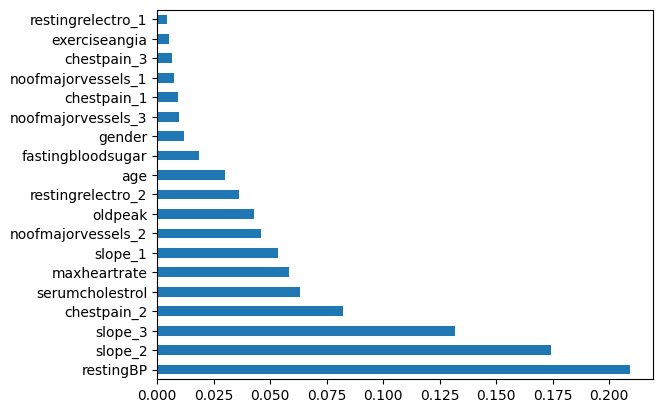

In [ ]:
#Feature Selection using Embedded Methods

#Random Forest Feature Importance Plot
from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
random_forest_embedded = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
random_forest_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(random_forest_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['restingrelectro_1','exerciseangia','chestpain_3','noofmajorvessels_3','gender','fastingbloodsugar']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Separate target column
x_simple = data_india_coded.drop(columns=['target'] + features_remove)
y_simple = data_india_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[india_numerical] = scaler.fit_transform(x_simple[india_numerical])

In [ ]:
#Repeat Random Forest Classifier and Output Statistics
#Initialize the random forest classifier and assign to variable india_random_forest. Assign random_state 0 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
india_random_forest.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the india_random_forest model
target_pred_random_forest = india_random_forest.predict(x_test_embedded)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,96.0,0.939,0.952,0.977,0.964,0.919


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable india_random_forest. Assign random_state 42 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_india_rf = GridSearchCV(india_random_forest , param_grid, cv=10)
grid_india_rf.fit(x_train_embedded, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_india_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
india_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
india_random_forest.fit(x_train_embedded, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = india_random_forest.predict(x_test_embedded)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

{'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,95.5,0.927,0.943,0.977,0.96,0.909


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
india_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= india_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       97.23
Precision      97.19
Recall         98.10
F1 Score       97.63
MCC            94.36
Specificity    96.03
dtype: float64

Standard Deviation Metrics:
Accuracy       1.65
Precision      1.96
Recall         1.83
F1 Score       1.41
MCC            3.39
Specificity    2.82
dtype: float64


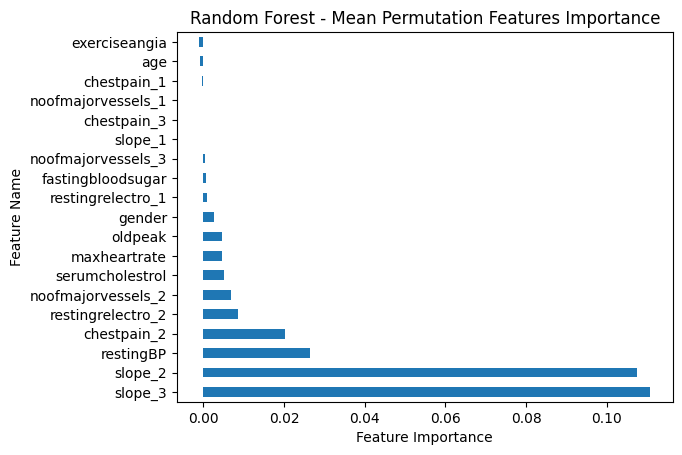

In [ ]:
#Feature Selection using Embedded Methods

#Random Forest Feature Importance Plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance #Neccessary class for permutation importances

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
random_forest_embedded = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
random_forest_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
random_permutation= permutation_importance(random_forest_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(random_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest - Mean Permutation Features Importance')
plt.show()


#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['exerciseangia','age','chestpain_1','noofmajorvessels_1','chestpain_3','slope_1','noofmajorvessels_3','fastingbloodsugar','restingrelectro_1','gender','oldpeak','maxheartrate','serumcholestrol','noofmajorvessels_2','restingrelectro_2']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP']

#Separate target column
x_simple = data_india_coded.drop(columns=['target'] + features_remove)
y_simple = data_india_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[india_numerical] = scaler.fit_transform(x_simple[india_numerical])

In [ ]:
#Repeat Random Forest Classifier and Output Statistics
#Initialize the random forest classifier and assign to variable india_random_forest. Assign random_state 0 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
india_random_forest.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the india_random_forest model
target_pred_random_forest = india_random_forest.predict(x_test_perm)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,86.75,0.844,0.875,0.887,0.881,0.732


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
india_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= india_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))


#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       92.97
Precision      94.66
Recall         93.28
F1 Score       93.89
MCC            85.80
Specificity    92.54
dtype: float64

Standard Deviation Metrics:
Accuracy       2.70
Precision      3.35
Recall         3.85
F1 Score       2.39
MCC            5.43
Specificity    4.87
dtype: float64


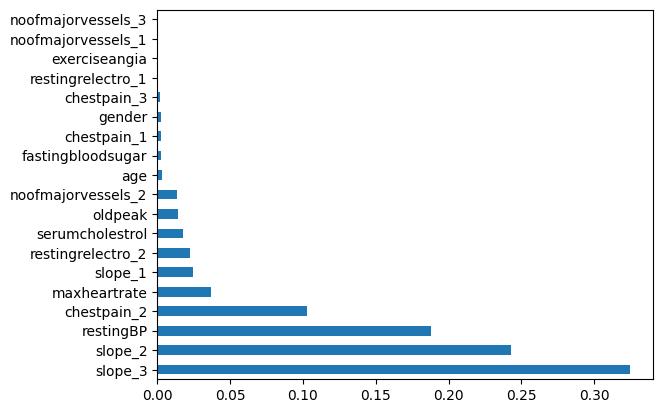

In [ ]:
#Feature Selection using Embedded Methods

#Gradient Boosting Feature Importance Plot
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
gradient_embedded =GradientBoostingClassifier(random_state=42)

#Fit the training data set to the random forest classifier
gradient_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(gradient_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['noofmajorvessels_3','noofmajorvessels_1','exerciseangia','restingrelectro_1','chestpain_3','gender','chestpain_1','fastingbloodsugar','age','noofmajorvessels_2','oldpeak','serumcholestrol','restingrelectro_2','slope_1']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =[ 'restingBP','maxheartrate']

#Separate target column
x_simple = data_india_coded.drop(columns=['target'] + features_remove)
y_simple = data_india_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[india_numerical] = scaler.fit_transform(x_simple[india_numerical])

In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 42 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Fit the training data set to the support vector machine classifier
india_gradient.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the india_gradient
target_pred_gradient = india_gradient.predict(x_test_embedded)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,92.25,0.899,0.92,0.941,0.931,0.843


In [ ]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable india_gradient. Assign random_state 42 to reproduce results
india_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
india_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_india_gb = GridSearchCV(india_gradient, param_dist, cv=10)
grid_india_gb.fit(x_train_embedded, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_india_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
india_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
india_gradient.fit(x_train_embedded, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the india_gradient
target_pred_gradient = india_gradient.predict(x_test_embedded)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,93.0,0.911,0.929,0.946,0.937,0.858


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       93.27
Precision      94.34
Recall         94.14
F1 Score       94.19
MCC            86.30
Specificity    92.07
dtype: float64

Standard Deviation Metrics:
Accuracy       2.03
Precision      2.70
Recall         2.85
F1 Score       1.76
MCC            4.14
Specificity    4.07
dtype: float64


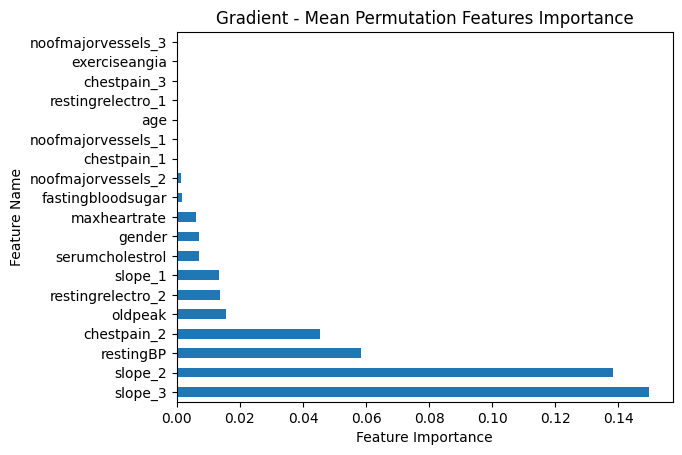

In [ ]:
#Feature Selection using Embedded Methods

#Gradient Boosting Feature Importance Plot
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance #Neccessary class for permutation importances

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
gradient_embedded =GradientBoostingClassifier(random_state=42)

#Fit the training data set to the random forest classifier
gradient_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
gradient_permutation= permutation_importance(gradient_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(gradient_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Gradient - Mean Permutation Features Importance')
plt.show()

#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['noofmajorvessels_3','exerciseangia','chestpain_3','restingrelectro_1','age','noofmajorvessels_1','chestpain_1','noofmajorvessels_2','fastingbloodsugar','maxheartrate','gender','serumcholestrol']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP', 'oldpeak']

#Separate target column
x_simple = data_india_coded.drop(columns=['target'] + features_remove)
y_simple = data_india_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[india_numerical] = scaler.fit_transform(x_simple[india_numerical])

In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 42 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Fit the training data set to the support vector machine classifier
india_gradient.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the india_gradient
target_pred_gradient = india_gradient.predict(x_test_perm)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,94.75,0.922,0.939,0.968,0.953,0.894


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       95.20
Precision      95.81
Recall         95.98
F1 Score       95.87
MCC            90.20
Specificity    94.13
dtype: float64

Standard Deviation Metrics:
Accuracy       2.09
Precision      2.41
Recall         2.28
F1 Score       1.80
MCC            4.29
Specificity    3.46
dtype: float64


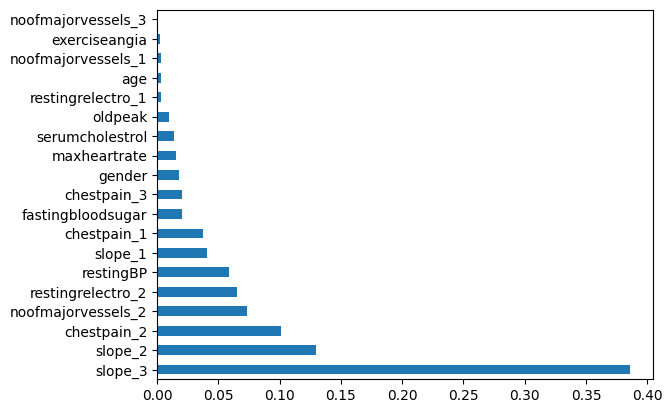

In [ ]:
#Feature Selection using Embedded Methods

#XGBoost Feature Importance Plot
import xgboost as xgb

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
xgboost_embedded =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the random forest classifier
xgboost_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Extract feature importance plot
(pd.Series(xgboost_embedded.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#Based on feature importance plot, all features below slope_1 appear to be most relevant

#Drop least releavnt features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['noofmajorvessels_3','exerciseangia','noofmajorvessels_1','age','restingrelectro_1','oldpeak','serumcholestrol','maxheartrate','gender','chestpain_3','fastingbloodsugar']

#Remove selected features from x_train and x_test
x_train_embedded = x_train.drop(columns=features_remove)
x_test_embedded = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =[ 'restingBP']

#Separate target column
x_simple = data_india_coded.drop(columns=['target'] + features_remove)
y_simple = data_india_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[india_numerical] = scaler.fit_transform(x_simple[india_numerical])

In [ ]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the support vector machine classifier
india_xgb.fit(x_train_embedded, y_train.values.ravel()).predict(x_test_embedded)

#Predict the presence of heart disese by inputting the test data into the india_xgb
target_pred_xgb = india_xgb.predict(x_test_embedded)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,94.0,0.916,0.934,0.959,0.946,0.879


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       95.30
Precision      95.52
Recall         96.50
F1 Score       95.98
MCC            90.42
Specificity    93.65
dtype: float64

Standard Deviation Metrics:
Accuracy       2.07
Precision      2.60
Recall         2.33
F1 Score       1.76
MCC            4.25
Specificity    3.82
dtype: float64


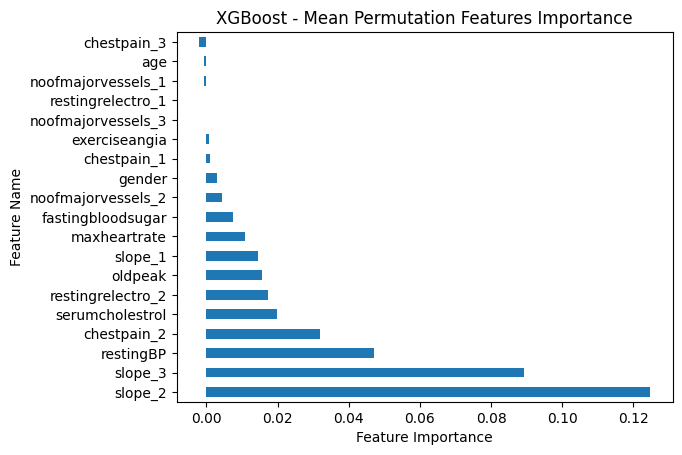

In [ ]:
#Feature Selection using Embedded Methods

#XGBoost Feature Importance Plot
import xgboost as xgb

#Initialize the random forest classifier. Assign random_state 42 to reproduce results
xgboost_embedded =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the random forest classifier
xgboost_embedded.fit(x_train, y_train.values.ravel()).predict(x_test)

#Calculate the feature importance based on the permutation method
xgboost_permutation= permutation_importance(xgboost_embedded, x_test, y_test, n_repeats=10, random_state=42)

#Extract feature importance plot
(pd.Series(xgboost_permutation.importances_mean, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

import matplotlib.pyplot as plt
# Add plot labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('XGBoost - Mean Permutation Features Importance')
plt.show()

#Based on feature importance plot, all features below ca_1 appear to be most relevant

#Drop least relevant features from x_train and x_test

#Features to drop based on importance chart
features_remove = ['exerciseangia','age','chestpain_1','noofmajorvessels_1','chestpain_3','slope_3','noofmajorvessels_3','fastingbloodsugar','restingrelectro_1','gender','oldpeak','maxheartrate','serumcholestrol','noofmajorvessels_2','restingrelectro_2']

#Remove selected features from x_train and x_test
x_train_perm = x_train.drop(columns=features_remove)
x_test_perm = x_test.drop(columns=features_remove)

In [ ]:
#Remove features from consistent dataset

#Modify consistent dataset for k-fold cross-validation

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP']

#Separate target column
x_simple = data_india_coded.drop(columns=['target'] + features_remove)
y_simple = data_india_coded['target']

#Initialize RobustScaler
scaler = RobustScaler()
#Fit the consistent dataset to the RobustScaler instance.
x_simple[india_numerical] = scaler.fit_transform(x_simple[india_numerical])

In [ ]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the support vector machine classifier
india_xgb.fit(x_train_perm, y_train.values.ravel()).predict(x_test_perm)

#Predict the presence of heart disese by inputting the test data into the india_xgb
target_pred_xgb = india_xgb.predict(x_test_perm)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,95.75,0.944,0.955,0.968,0.962,0.914


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_simple, y_simple.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_simple.iloc[train_index], x_simple.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_simple.iloc[train_index], y_simple.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0),2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

Mean Metrics:
Accuracy       95.20
Precision       0.96
Recall          0.96
F1 Score        0.96
MCC             0.90
Specificity     0.94
dtype: float64

Standard Deviation Metrics:
Accuracy       2.09
Precision      0.02
Recall         0.02
F1 Score       0.02
MCC            0.04
Specificity    0.04
dtype: float64


**Wrapper Methods of Feature Selection: Backwards Elimination**

In [ ]:
pip install mlxtend

**Backward Elimination: Decision Tree Classifier**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate decision tree classifier and set random state to ensure reproducibility of the results
decision_backward =DecisionTreeClassifier(random_state = 42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=decision_backward,
           k_features=(1, 19), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train)

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
19  0.936667  (age, gender, restingBP, serumcholestrol, fast...
18      0.95  (age, gender, restingBP, serumcholestrol, maxh...
17  0.951667  (gender, restingBP, serumcholestrol, maxheartr...
16  0.956667  (gender, restingBP, serumcholestrol, maxheartr...
15  0.953333  (gender, restingBP, serumcholestrol, maxheartr...
14  0.953333  (gender, restingBP, serumcholestrol, maxheartr...
13     0.955  (restingBP, serumcholestrol, maxheartrate, exe...
12  0.956667  (restingBP, maxheartrate, exerciseangia, oldpe...
11  0.953333  (restingBP, maxheartrate, oldpeak, chestpain_1...
10  0.951667  (restingBP, maxheartrate, oldpeak, chestpain_1...
9   0.953333  (restingBP, maxheartrate, oldpeak, chestpain_1...
8   0.953333  (restingBP, maxheartrate, oldpeak, chestpain_1...
7       0.95  (restingBP, maxheartrate, oldpeak, chestpain_1...
6   0.951667  (restingBP, maxheartrate, oldpeak, chestpain_2...
5      0.945  (restingBP, maxheartrate, 

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_india_coded.drop(columns=['target'])
y_backward = data_india_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[india_numerical] = scaler.fit_transform(x_backward[india_numerical])

x_backward.head()

,gender,restingBP,serumcholestrol,maxheartrate,exerciseangia,oldpeak,chestpain_1,chestpain_2,chestpain_3,restingrelectro_1,restingrelectro_2,slope_2,slope_3,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3
0,1,0.461538,-1.887240,0.018100,0,1.035714,0,1,0,1,0,0,1,0,0,1
1,1,-1.019231,-0.528190,-0.561086,0,0.464286,0,0,0,1,0,0,0,1,0,0
2,1,-0.269231,-1.044510,1.013575,1,0.928571,0,1,0,0,0,0,0,0,0,0
3,1,-0.173077,-0.136499,0.126697,0,0.285714,0,0,0,1,0,1,0,0,1,0
4,1,1.000000,-1.887240,-0.180995,0,1.035714,1,0,0,0,1,0,1,0,1,0


In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the decision tree classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_decision_tree = DecisionTreeClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_decision_tree.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the india_decision_tree model
target_pred_decision_tree = india_decision_tree.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Decision Tree,94.75,0.955,0.963,0.941,0.952,0.894,0.012678,282.39


In [ ]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
india_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_india_dt = GridSearchCV(india_decision_tree , param_grid, cv=10)
grid_india_dt.fit(x_train_backward, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_india_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
india_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
india_decision_tree.fit(x_train_backward, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = india_decision_tree.predict(x_test_backward)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,94.75,0.955,0.963,0.941,0.952,0.894


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
india_decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold (will complete 30 rounds in total)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    india_decision_tree.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_decision_tree = india_decision_tree.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_decision_tree)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_decision_tree, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_decision_tree)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_decision_tree, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       95.67
Precision      96.59
Recall         95.98
F1 Score       96.24
MCC            91.23
Specificity    95.24
dtype: float64

Standard Deviation Metrics:
Accuracy       1.58
Precision      1.94
Recall         2.80
F1 Score       1.40
MCC            3.19
Specificity    2.86
dtype: float64


**Backward Elimination: Random Forest**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
random_backward =RandomForestClassifier(random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=random_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
19  0.966667  (age, gender, restingBP, serumcholestrol, fast...
18  0.973333  (age, gender, restingBP, serumcholestrol, fast...
17  0.971667  (age, gender, restingBP, serumcholestrol, fast...
16  0.971667  (gender, restingBP, serumcholestrol, fastingbl...
15  0.971667  (gender, restingBP, serumcholestrol, fastingbl...
14     0.975  (gender, restingBP, serumcholestrol, fastingbl...
13  0.973333  (gender, restingBP, serumcholestrol, fastingbl...
12     0.975  (gender, restingBP, serumcholestrol, fastingbl...
11  0.973333  (gender, restingBP, serumcholestrol, fastingbl...
10  0.971667  (gender, restingBP, serumcholestrol, fastingbl...
9   0.981667  (gender, restingBP, serumcholestrol, fastingbl...
8   0.978333  (gender, restingBP, serumcholestrol, chestpain...
7      0.975  (gender, restingBP, chestpain_1, chestpain_2, ...
6      0.965  (gender, restingBP, chestpain_1, chestpain_2, ...
5      0.955  (restingBP, chestpain_1, c

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP', 'serumcholestrol']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_india_coded.drop(columns=['target'])
y_backward = data_india_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[india_numerical] = scaler.fit_transform(x_backward[india_numerical])

x_backward.head()

,age,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,oldpeak,chestpain_1,chestpain_2,chestpain_3,restingrelectro_1,restingrelectro_2,slope_1,slope_2,slope_3,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3
0,53,1,0.461538,-1.887240,0,147,5.3,0,1,0,1,0,0,0,1,0,0,1
1,40,1,-1.019231,-0.528190,0,115,3.7,0,0,0,1,0,1,0,0,1,0,0
2,49,1,-0.269231,-1.044510,0,202,5.0,0,1,0,0,0,1,0,0,0,0,0
3,43,1,-0.173077,-0.136499,1,153,3.2,0,0,0,1,0,0,1,0,0,1,0
4,31,1,1.000000,-1.887240,0,136,5.3,1,0,0,0,1,0,0,1,0,1,0


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_random_forest = RandomForestClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_random_forest.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the india_random_forest model
target_pred_random_forest = india_random_forest.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest, specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Random Forest,96.5,0.944,0.956,0.982,0.969,0.929,0.998488,266.73


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the classifier and assign it to the variable. Assign random_state 42 to ensure reproducibility of results
india_random_forest = RandomForestClassifier(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    india_random_forest.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_random_forest= india_random_forest.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_random_forest)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_random_forest, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_random_forest)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_random_forest, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold

**Backward Elimination: Logistic Regression**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
logistic_backward =LogisticRegression(random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=logistic_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
19     0.955  (age, gender, restingBP, serumcholestrol, fast...
18  0.958333  (age, gender, restingBP, serumcholestrol, fast...
17  0.958333  (age, gender, restingBP, serumcholestrol, fast...
16  0.958333  (gender, restingBP, serumcholestrol, fastingbl...
15  0.958333  (gender, restingBP, fastingbloodsugar, maxhear...
14  0.956667  (gender, restingBP, fastingbloodsugar, maxhear...
13     0.955  (gender, restingBP, fastingbloodsugar, maxhear...
12     0.955  (gender, restingBP, fastingbloodsugar, maxhear...
11  0.953333  (gender, restingBP, maxheartrate, oldpeak, che...
10  0.953333  (restingBP, maxheartrate, oldpeak, chestpain_1...
9   0.951667  (restingBP, maxheartrate, oldpeak, chestpain_1...
8       0.95  (restingBP, maxheartrate, oldpeak, chestpain_1...
7       0.95  (restingBP, maxheartrate, chestpain_1, chestpa...
6   0.943333  (restingBP, chestpain_1, chestpain_2, slope_2,...
5   0.941667  (restingBP, chestpain_1, c

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_india_coded.drop(columns=['target'])
y_backward = data_india_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[india_numerical] = scaler.fit_transform(x_backward[india_numerical])

x_backward.head()

,age,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,oldpeak,chestpain_1,chestpain_2,chestpain_3,restingrelectro_1,restingrelectro_2,slope_1,slope_2,slope_3,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3
0,0.132231,1,0.461538,-1.887240,0,0.018100,1.035714,0,1,0,1,0,0,0,1,0,0,1
1,-0.297521,1,-1.019231,-0.528190,0,-0.561086,0.464286,0,0,0,1,0,1,0,0,1,0,0
2,0.000000,1,-0.269231,-1.044510,0,1.013575,0.928571,0,1,0,0,0,1,0,0,0,0,0
3,-0.198347,1,-0.173077,-0.136499,1,0.126697,0.285714,0,0,0,1,0,0,1,0,0,1,0
4,-0.595041,1,1.000000,-1.887240,0,-0.180995,1.035714,1,0,0,0,1,0,0,1,0,1,0


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_logistic_reg = LogisticRegression(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_logistic_reg.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the india_logistic_reg model
target_pred_logistic_reg = india_logistic_reg.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_logistic_reg =  round(accuracy_score(y_test, target_pred_logistic_reg),4)*100
precision_logistic_reg = round(precision_score(y_test, target_pred_logistic_reg, pos_label=1),3)
recall_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=1),3)
f1_score_logistic_reg = round(f1_score(y_test, target_pred_logistic_reg, pos_label=1),3)
mcc_logistic_reg = round(matthews_corrcoef(y_test, target_pred_logistic_reg),3)
specificity_logistic_reg = round(recall_score(y_test, target_pred_logistic_reg, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic_reg = [["Logistic Regression", accuracy_logistic_reg, specificity_logistic_reg,precision_logistic_reg,recall_logistic_reg,f1_score_logistic_reg,mcc_logistic_reg, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic_reg, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_reg = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Logistic Regression,95.25,0.922,0.939,0.977,0.958,0.904,0.102162,266.73


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_logistic_reg = LogisticRegression(random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    india_logistic_reg.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_logistic_reg= india_logistic_reg.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_logistic_reg)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_logistic_reg, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_logistic_reg)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_logistic_reg, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



**Backward Elimination: Support Vector Machine**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
support_vector_backward =svm.SVC(kernel='linear', random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=support_vector_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])


   avg_score                                      feature_names
19  0.953333  (age, gender, restingBP, serumcholestrol, fast...
18  0.963333  (age, gender, restingBP, serumcholestrol, maxh...
17  0.963333  (age, gender, restingBP, serumcholestrol, maxh...
16  0.963333  (age, gender, restingBP, serumcholestrol, maxh...
15  0.963333  (age, gender, restingBP, serumcholestrol, maxh...
14     0.965  (gender, restingBP, serumcholestrol, maxheartr...
13  0.966667  (gender, restingBP, serumcholestrol, exercisea...
12  0.966667  (gender, restingBP, exerciseangia, oldpeak, ch...
11  0.963333  (gender, restingBP, oldpeak, chestpain_1, ches...
10      0.96  (gender, restingBP, oldpeak, chestpain_1, ches...
9   0.956667  (gender, restingBP, oldpeak, chestpain_1, ches...
8      0.955  (gender, restingBP, chestpain_1, chestpain_2, ...
7      0.945  (restingBP, chestpain_1, chestpain_2, chestpai...
6       0.94  (restingBP, chestpain_1, chestpain_2, slope_1,...
5   0.916667  (restingBP, chestpain_1, s

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP', 'serumcholestrol', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_india_coded.drop(columns=['target'])
y_backward = data_india_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[india_numerical] = scaler.fit_transform(x_backward[india_numerical])

x_backward.head()

,gender,restingBP,serumcholestrol,exerciseangia,oldpeak,chestpain_1,chestpain_2,chestpain_3,restingrelectro_2,slope_1,slope_2,slope_3,noofmajorvessels_2
0,1,0.461538,-1.887240,0,1.035714,0,1,0,0,0,0,1,0
1,1,-1.019231,-0.528190,0,0.464286,0,0,0,0,1,0,0,0
2,1,-0.269231,-1.044510,1,0.928571,0,1,0,0,1,0,0,0
3,1,-0.173077,-0.136499,0,0.285714,0,0,0,0,0,1,0,1
4,1,1.000000,-1.887240,0,1.035714,1,0,0,1,0,0,1,1


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Support Vector Machine

from sklearn.model_selection import cross_val_score
from sklearn import svm

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_support_vector = svm.SVC(kernel='linear', random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_support_vector.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_support_vector = india_support_vector.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector, specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics



,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Support Vector,96.75,0.95,0.96,0.982,0.971,0.934,0.05587,266.73


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import svm
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_support_vector = svm.SVC(kernel='linear', random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    india_support_vector.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_support_vector= india_support_vector.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_support_vector)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_support_vector, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_support_vector)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_support_vector, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold





**Backward Elimination: Gradient Boosting**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
gradient_backward =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=gradient_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
19  0.966667  (age, gender, restingBP, serumcholestrol, fast...
18  0.968333  (age, gender, restingBP, serumcholestrol, fast...
17  0.968333  (age, gender, restingBP, serumcholestrol, fast...
16  0.968333  (age, gender, restingBP, serumcholestrol, fast...
15  0.966667  (age, gender, restingBP, serumcholestrol, fast...
14  0.971667  (gender, restingBP, serumcholestrol, fastingbl...
13     0.975  (gender, restingBP, serumcholestrol, fastingbl...
12     0.975  (gender, restingBP, serumcholestrol, fastingbl...
11      0.97  (gender, restingBP, serumcholestrol, fastingbl...
10      0.97  (gender, restingBP, fastingbloodsugar, maxhear...
9   0.968333  (gender, restingBP, maxheartrate, oldpeak, che...
8   0.963333  (restingBP, maxheartrate, oldpeak, chestpain_2...
7       0.96  (restingBP, maxheartrate, oldpeak, chestpain_2...
6   0.953333  (restingBP, maxheartrate, oldpeak, chestpain_2...
5       0.95  (restingBP, maxheartrate, 

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP', 'maxheartrate']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_india_coded.drop(columns=['target'])
y_backward = data_india_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[india_numerical] = scaler.fit_transform(x_backward[india_numerical])

x_backward.head()

,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,oldpeak,chestpain_2,chestpain_3,restingrelectro_1,slope_1,slope_2,slope_3
0,1,0.461538,0,0,0.018100,0,5.3,1,0,1,0,0,1
1,1,-1.019231,229,0,-0.561086,0,3.7,0,0,1,1,0,0
2,1,-0.269231,142,0,1.013575,1,5.0,1,0,0,1,0,0
3,1,-0.173077,295,1,0.126697,0,3.2,0,0,1,0,1,0
4,1,1.000000,0,0,-0.180995,0,5.3,0,0,0,0,0,1


In [ ]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable india_decision_tree. Assign random_state 42 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Fit the training data set to the support vector machine classifier
india_gradient.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Predict the presence of heart disese by inputting the test data into the india_gradient
target_pred_gradient = india_gradient.predict(x_test_backward)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient,computational_time,memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC','Computation Speed','Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computation Speed,Memory Usage
,Gradient Boosting,96.25,0.933,0.948,0.986,0.967,0.925,0.107876,266.99


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1)*100,2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient)*100,2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0)*100,2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



**Backward Elimination: XGBoost**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Instantiate classifier and set random state to ensure reproducibility of the results
xgb_backward =xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=xgb_backward,
           k_features=(1, 16), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train, y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
19  0.958333  (age, gender, restingBP, serumcholestrol, fast...
18  0.966667  (gender, restingBP, serumcholestrol, fastingbl...
17     0.975  (gender, restingBP, serumcholestrol, fastingbl...
16      0.98  (gender, restingBP, serumcholestrol, fastingbl...
15  0.983333  (gender, restingBP, serumcholestrol, fastingbl...
14  0.983333  (gender, restingBP, serumcholestrol, fastingbl...
13  0.978333  (gender, restingBP, serumcholestrol, fastingbl...
12     0.975  (gender, restingBP, serumcholestrol, fastingbl...
11  0.973333  (gender, restingBP, serumcholestrol, fastingbl...
10  0.973333  (gender, restingBP, serumcholestrol, fastingbl...
9   0.971667  (gender, restingBP, serumcholestrol, fastingbl...
8   0.968333  (gender, restingBP, serumcholestrol, fastingbl...
7      0.965  (gender, restingBP, serumcholestrol, fastingbl...
6       0.96  (gender, restingBP, serumcholestrol, fastingbl...
5       0.95  (gender, serumcholestrol, 

In [ ]:
#Select columns from x_train and x_test identified by backward elimination
selected_features = list(max_features['feature_idx'].values[0])
x_train_backward = x_train.iloc[:,selected_features]
x_test_backward = x_test.iloc[:,selected_features]

In [ ]:
#Modify consistent dataset for k-fold cross-validation

#Features to drop based on simple filters
features_select= list(max_features['feature_names'].values[0])

#Data will be scaled using the robust scaler that is less susceptible to outliers
from sklearn.preprocessing import RobustScaler

#Subset of numerical features
india_numerical =['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Initialize RobustScaler
scaler = RobustScaler()

#Separate target column
x_backward = data_india_coded.drop(columns=['target'])
y_backward = data_india_coded['target']

#Choose variables
x_backward = x_backward[x_backward.columns.intersection(features_select)]

#Fit the consistent dataset to the RobustScaler instance.
x_backward[india_numerical] = scaler.fit_transform(x_backward[india_numerical])

x_backward.head()

,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,oldpeak,chestpain_1,chestpain_2,chestpain_3,slope_1,slope_2,slope_3,noofmajorvessels_1,noofmajorvessels_3
0,1,0.461538,-1.887240,0,0.018100,0,1.035714,0,1,0,0,0,1,0,1
1,1,-1.019231,-0.528190,0,-0.561086,0,0.464286,0,0,0,1,0,0,1,0
2,1,-0.269231,-1.044510,0,1.013575,1,0.928571,0,1,0,1,0,0,0,0
3,1,-0.173077,-0.136499,1,0.126697,0,0.285714,0,0,0,0,1,0,0,0
4,1,1.000000,-1.887240,0,-0.180995,0,1.035714,1,0,0,0,0,1,0,0


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#XGBoost

#Import xgb boosting classifier from scikit-learn libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the classifier and assign to variable. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
india_xgb.fit(x_train_backward, y_train.values.ravel()).predict(x_test_backward)

#Predict the presence of heart disese by inputting the test data into the model
target_pred_xgb = india_xgb.predict(x_test_backward)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb, specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb = performance_metrics

performance_metrics


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,XGBoost,97.75,0.955,0.965,0.995,0.98,0.955,0.801514,266.99


In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import xgboost as xgb
import numpy as np

#Initialize the classifier and assign to variable india_decision_tree. Assign random_state 0 to reproduce results
india_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.3, max_depth=3, enable_categorical=True, seed= 42)

# Initialize RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

#We will begin by iterating through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_backward, y_backward.values.ravel()):
    #Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_backward.iloc[train_index], x_backward.iloc[test_index]
    #Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_backward.iloc[train_index], y_backward.iloc[test_index]

    #Fit the training data set to the classifier
    india_gradient.fit(x_train_fold, y_train_fold.values.ravel())

    #Predict the presence of heart disease by inputting the test data
    target_pred_gradient= india_gradient.predict(x_test_fold)

    #Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_gradient)*100,2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_gradient, pos_label=1),2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_gradient),2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_gradient, pos_label=0),2))

#Create a DataFrame to store metrics for each fold and repeat
performance_metrics_fold = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

#Calculate mean and standard deviation across folds and repeats
mean_metrics = round(performance_metrics_fold.mean(),2)
std_metrics = round(performance_metrics_fold.std(),2)

#Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics)
print('\nStandard Deviation Metrics:')
print(std_metrics)

#performance_metrics_fold



Mean Metrics:
Accuracy       97.67
Precision       0.98
Recall          0.98
F1 Score        0.98
MCC             0.95
Specificity     0.97
dtype: float64

Standard Deviation Metrics:
Accuracy       1.30
Precision      0.02
Recall         0.01
F1 Score       0.01
MCC            0.03
Specificity    0.02
dtype: float64


**Backward Elimination: Naive Bayes**

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Perform backward elimination on categorical variables

#Instantiate classifier and set random state to ensure reproducibility of the results
naive_cat_backward =CategoricalNB()

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=naive_cat_backward,
           k_features=(1, len(india_categorical_nb)), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train[india_categorical_nb], y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])

#In addition, output the feature names to assist in naive bayes classification
print(max_features['feature_names'].values[0])

   avg_score                                      feature_names
12      0.92  (fastingbloodsugar, chestpain_1, chestpain_2, ...
11      0.94  (fastingbloodsugar, chestpain_1, chestpain_2, ...
10      0.95  (fastingbloodsugar, chestpain_1, chestpain_2, ...
9       0.95  (fastingbloodsugar, chestpain_1, chestpain_2, ...
8       0.95  (fastingbloodsugar, chestpain_1, chestpain_2, ...
7   0.946667  (fastingbloodsugar, chestpain_1, chestpain_2, ...
6   0.943333  (fastingbloodsugar, chestpain_2, restingrelect...
5   0.933333  (fastingbloodsugar, restingrelectro_2, slope_2...
4      0.925  (fastingbloodsugar, restingrelectro_2, slope_2...
3   0.931667              (restingrelectro_2, slope_2, slope_3)
2   0.916667                                 (slope_2, slope_3)
1      0.715                                         (slope_2,)
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10)
('fastingbloodsugar', 'chestpain_1', 'chestpain_2', 'chestpain_3', 'restingrelectro_1', 'restingrelectro_2', 'slope_2', 'slope_3', 'noof

In [ ]:
#Import sequential feature selector class from mlxtend.feature_selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Perform backward elimination on numerical variables

#Instantiate classifier and set random state to ensure reproducibility of the results
naive_num_backward =GaussianNB()

#Instantiate backward elimination feature selection
backward_elim = SFS(estimator=naive_num_backward,
           k_features=(1, len(india_numerical_nb)), #Indicate that any number of features between 0 and 20 may be chosen to maximize the score
           forward=False,
           floating=False,
           scoring='accuracy', #Metric to maximized
           cv=5) #5-fold cross-validation to be used during feature selection

#Fit backward elimination feature selection using the training data
backward_elim = backward_elim.fit(x_train[india_numerical_nb], y_train.values.ravel())

#Access average accuracy scores and feature names
results = pd.DataFrame.from_dict(backward_elim.get_metric_dict()).T
print(results[['avg_score', 'feature_names']])

#Identify the maximum average score calculate and print the corresponding feature indices
max_features = results[results['avg_score'] == results['avg_score'].max()]
print(max_features['feature_idx'].values[0])

#In addition, output the feature names to assist in naive bayes classification
print(max_features['feature_names'].values[0])

  avg_score                                      feature_names
4  0.813333  (restingBP, serumcholestrol, maxheartrate, old...
3  0.788333         (restingBP, serumcholestrol, maxheartrate)
2  0.786667                          (restingBP, maxheartrate)
1     0.755                                       (restingBP,)
(0, 1, 2, 3)
('restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak')


In [ ]:
#Repeat classifier and calculate performance metrics using only selected features

#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Import classes to calculate memory consumption and runtime
import timeit
import psutil

#Initialize the naive bayes models and assign to variable
india_naive_numerical = GaussianNB()
india_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
india_categorical_nb = ['fastingbloodsugar', 'chestpain_1', 'chestpain_2', 'chestpain_3', 'restingrelectro_1', 'restingrelectro_2', 'slope_2', 'slope_3', 'noofmajorvessels_1', 'noofmajorvessels_2']
india_numerical_nb = ['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

# Fit the categorical features in the training data set to the categorical naive bayes model
india_naive_categorical.fit(x_train[india_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
india_naive_numerical.fit(x_train[india_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = india_naive_categorical.predict_proba(x_test[india_categorical_nb])
probability_numerical= india_naive_numerical.predict_proba(x_test[india_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage in megabytes
memory_usage = round(psutil.Process().memory_info().rss/ (1024 * 1024),2)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive, computational_time, memory_usage]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC', 'Computational Speed', 'Memory Usage'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC,Computational Speed,Memory Usage
,Naive Bayes,93.75,0.872,0.905,0.991,0.946,0.877,0.043865,266.99


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import CategoricalNB, GaussianNB

# List categorical and numerical feature names
india_categorical_nb = ['sex', 'exang', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_2', 'thal_3']
india_numerical_nb = ['trestbps','thalach','oldpeak']

# Initialize Naive Bayes models and assign to variables
india_naive_categorical = CategoricalNB()
india_naive_numerical = GaussianNB()

# Combine categorical and numerical features
x_train_backward = x_train[india_categorical_nb + india_numerical_nb]

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create empty lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
mcc_list = []
specificity_list = []

# Iterate through the folds created by the Stratified K-fold
for train_index, test_index in cv.split(x_train, y_train):
    # Start by grouping training and testing features based on training and testing row indices within the fold
    x_train_fold, x_test_fold = x_train_backward.iloc[train_index], x_train_backward.iloc[test_index]
    # Group labels based on training and testing row indices within the fold
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the training data set to the categorical and numerical Naive Bayes models
    india_naive_categorical.fit(x_train_fold[india_categorical_nb], y_train_fold.values.ravel())
    india_naive_numerical.fit(x_train_fold[india_numerical_nb], y_train_fold.values.ravel())

    # Predict probabilities for using categorical and numerical features
    probability_categorical = india_naive_categorical.predict_proba(x_test_fold[india_categorical_nb])
    probability_numerical = india_naive_numerical.predict_proba(x_test_fold[india_numerical_nb])

    # Combine the probabilities using the product rule
    total_probability = probability_categorical * probability_numerical

    # Use this code to select the class that has the greatest probability for a given row
    target_pred_naive = np.argmax(total_probability, axis=1)

    # Calculate performance metrics for the current fold
    accuracy_list.append(round(accuracy_score(y_test_fold, target_pred_naive) * 100, 2))
    precision_list.append(round(precision_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    recall_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    f1_list.append(round(f1_score(y_test_fold, target_pred_naive, pos_label=1) * 100, 2))
    mcc_list.append(round(matthews_corrcoef(y_test_fold, target_pred_naive) * 100, 2))
    specificity_list.append(round(recall_score(y_test_fold, target_pred_naive, pos_label=0) * 100, 2))

# Create a DataFrame to store metrics for each fold
performance_metrics_naive = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'MCC': mcc_list,
    'Specificity': specificity_list
})

# Calculate mean and standard deviation across folds
mean_metrics_naive = round(performance_metrics_naive.mean(), 2)
std_metrics_naive = round(performance_metrics_naive.std(), 2)

# Display mean and standard deviation
print('Mean Metrics:')
print(mean_metrics_naive)
print('\nStandard Deviation Metrics:')
print(std_metrics_naive)

# performance_metrics_naive